<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.622972  56.254254  94.177280  0.691919  237.746425   
      1.0    23.928661  56.118126  39.600974  1.092180  130.739941   
      2.0    70.172034  58.762111  70.367359  0.152049  209.453553   
      3.0    53.321232  33.751511  70.024224  0.021573  167.118540   
      4.0    22.552355  36.612184  37.128557 -2.432330  103.860766   
...                ...        ...        ...       ...         ...   
999.0 245.0  35.164075  49.803791  26.786845  0.975949  122.730659   
      246.0  64.334034  86.469683  86.585752  0.983195  248.372663   
      247.0  35.430741  29.619601  90.602628  1.111251  166.764221   
      248.0  39.936208  76.706634  27.137443  0.057779  153.838064   
      249.0  86.533429  41.873960  55.947420 -1.125641  193.229168   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.050026  0.696400  
      1.0    129.433899  1.306042  
      2.0    209.251799  0.201754  
      3.0    166.897162  0.221378  
      4.0    105.982615 -2.121850  
...                 ...       ...  
999.0 245.0  121.847378  0.883282  
      246.0  247.313491  1.059172  
      247.0  165.861090  0.903131  
      248.0  153.766412  0.071652  
      249.0  194.344693 -1.115525  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.622972  56.254254  94.177280  0.691919  237.746425   
      1.0    23.928661  56.118126  39.600974  1.092180  130.739941   
      2.0    70.172034  58.762111  70.367359  0.152049  209.453553   
      3.0    53.321232  33.751511  70.024224  0.021573  167.118540   
      4.0    22.552355  36.612184  37.128557 -2.432330  103.860766   
...                ...        ...        ...       ...         ...   
999.0 245.0  35.164075  49.803791  26.786845  0.975949  122.730659   
      246.0  64.334034  86.469683  86.585752  0.983195  248.372663   
      247.0  35.430741  29.619601  90.602628  1.111251  166.764221   
      248.0  39.936208  76.706634  27.137443  0.057779  153.838064   
      249.0  86.533429  41.873960  55.947420 -1.125641  193.229168   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.050026  0.696400  
      1.0    129.433899  1.306042  
      2.0    209.251799  0.201754  
      3.0    166.897162  0.221378  
      4.0    105.982615 -2.121850  
...                 ...       ...  
999.0 245.0  121.847378  0.883282  
      246.0  247.313491  1.059172  
      247.0  165.861090  0.903131  
      248.0  153.766412  0.071652  
      249.0  194.344693 -1.115525  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.622972  56.254254  94.177280  0.691919  237.746425   
      1.0    23.928661  56.118126  39.600974  1.092180  130.739941   
      2.0    70.172034  58.762111  70.367359  0.152049  209.453553   
      3.0    53.321232  33.751511  70.024224  0.021573  167.118540   
      4.0    22.552355  36.612184  37.128557 -2.432330  103.860766   
...                ...        ...        ...       ...         ...   
999.0 245.0  35.164075  49.803791  26.786845  0.975949  122.730659   
      246.0  64.334034  86.469683  86.585752  0.983195  248.372663   
      247.0  35.430741  29.619601  90.602628  1.111251  166.764221   
      248.0  39.936208  76.706634  27.137443  0.057779  153.838064   
      249.0  86.533429  41.873960  55.947420 -1.125641  193.229168   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.050026  0.696400  
      1.0    129.433899  1.306042  
      2.0    209.251799  0.201754  
      3.0    166.897162  0.221378  
      4.0    105.982615 -2.121850  
...                 ...       ...  
999.0 245.0  121.847378  0.883282  
      246.0  247.313491  1.059172  
      247.0  165.861090  0.903131  
      248.0  153.766412  0.071652  
      249.0  194.344693 -1.115525  

[250000 rows x 7 columns]

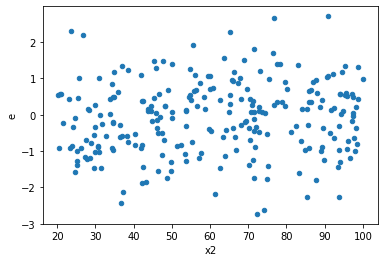

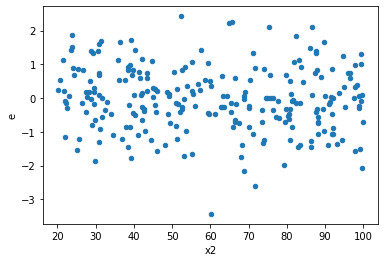

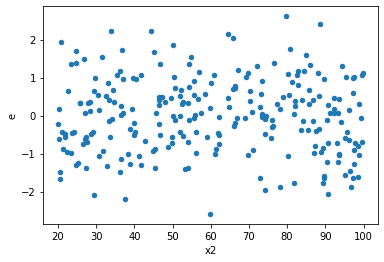

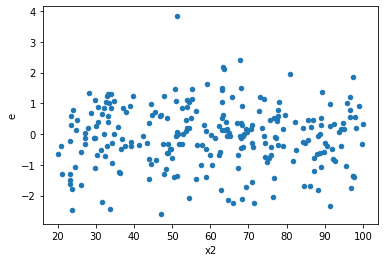

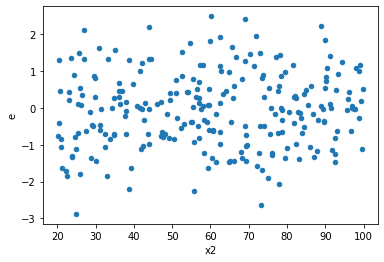

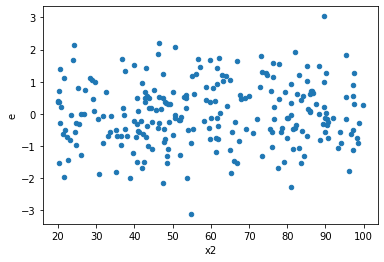

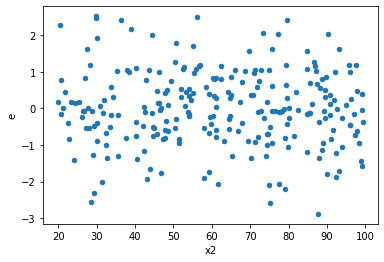

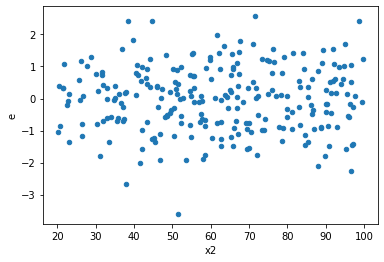

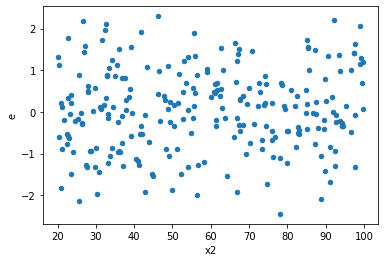

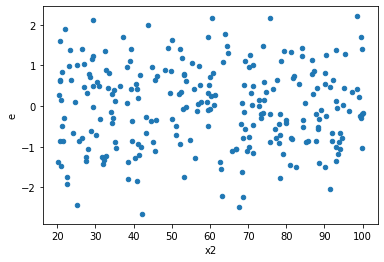

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,81.3895825155217,94.25559304219261,0.8390678609847597,0.9717071447648723,1.1580793282017052,0.4711920471922886,0.7644039764038557,0.2355960235961443,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,79.60376541119443,97.98658498975206,0.8206573753731384,1.0101709792757945,1.2309290205507353,0.3079192175076999,0.84604039124615,0.15395960875384995,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,97.25500585250458,101.42499445890611,1.0026289263144803,1.0456184995763518,1.0428768531742796,0.8366322753132649,0.5816838623433676,0.41831613765663245,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,90.17757248051437,105.35730582448039,0.9296656956754059,1.0861577920049525,1.1683315809731525,0.4450038568830119,0.777498071558494,0.22250192844150596,Reject001=1 : Homoscedasticity
9.0,97.0,97.0,98.80072761307481,99.08553900826502,1.0185642021966475,1.021500402147062,1.0028826851995016,0.9887193507760657,0.5056403246119672,0.4943596753880328,Reject001=1 : Homoscedasticity
12.0,97.0,97.0,83.32372381465119,93.32878531685571,0.8590074620067133,0.9621524259469661,1.1200745843339912,0.5776497679690977,0.7111751160154511,0.28882488398454886,Reject001=1 : Homoscedasticity
16.0,97.0,97.0,91.7754952514708,108.86806873604212,0.9461391263038227,1.1223512240829085,1.186243326039664,0.40181851934392787,0.7990907403280361,0.20090925967196394,Reject001=1 : Homoscedasticity
20.0,97.0,97.0,93.32613072298993,103.91379414742848,0.9621250589998962,1.071276228324005,1.1134480058523457,0.5977090312383044,0.7011454843808478,0.2988545156191522,Reject001=1 : Homoscedasticity
23.0,97.0,97.0,84.57379524044023,88.13225209253848,0.8718947962931983,0.9085799184797781,1.0420751704707312,0.8395834934382851,0.5802082532808575,0.41979174671914254,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,81.3895825155217,94.25559304219261,0.8390678609847597,0.9717071447648723,1.1580793282017052,0.4711920471922886,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,79.60376541119443,97.98658498975206,0.8206573753731384,1.0101709792757945,1.2309290205507353,0.3079192175076999,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,97.25500585250458,101.42499445890611,1.0026289263144803,1.0456184995763518,1.0428768531742796,0.8366322753132649,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,104.52743840911783,90.2632928038173,1.077602457825957,0.9305494103486319,0.8635368299233449,0.47132534702018114,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,100.45808672777937,95.68930678631835,1.0356503786369007,0.9864876988280242,0.9525296559312002,0.8112089692052546,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,94.12651178006068,91.31219324516074,0.9703764101037183,0.94136281696042,0.9701006817136072,0.8814782950786261,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,103.07008677990247,90.72459909023887,1.0625782142257987,0.9353051452601945,0.8802223993851256,0.531030902904629,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,90.17757248051437,105.35730582448039,0.9296656956754059,1.0861577920049525,1.1683315809731525,0.4450038568830119,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,87.85855296544615,81.69031879127293,0.9057582779942902,0.8421682349615766,0.9297935833680402,0.7207172936471177,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      991
Reject001=0 : Heteroscedasticity      9
Name: Result_test, dtype: int64